# Basic Optimizers in Gradient Descent


---


*   Batch
*   Stochastic
*   Mini-Batch



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
X_b = np.c_[np.ones((100,1)),X]


print(X_b)

[[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]
 [1.         1.19731697]
 [1.         0.31203728]
 [1.         0.31198904]
 [1.         0.11616722]
 [1.         1.73235229]
 [1.         1.20223002]
 [1.         1.41614516]
 [1.         0.04116899]
 [1.         1.9398197 ]
 [1.         1.66488528]
 [1.         0.42467822]
 [1.         0.36364993]
 [1.         0.36680902]
 [1.         0.60848449]
 [1.         1.04951286]
 [1.         0.86389004]
 [1.         0.58245828]
 [1.         1.22370579]
 [1.         0.27898772]
 [1.         0.5842893 ]
 [1.         0.73272369]
 [1.         0.91213997]
 [1.         1.57035192]
 [1.         0.39934756]
 [1.         1.02846888]
 [1.         1.18482914]
 [1.         0.09290083]
 [1.         1.2150897 ]
 [1.         0.34104825]
 [1.         0.13010319]
 [1.         1.89777107]
 [1.         1.93126407]
 [1.         1.6167947 ]
 [1.         0.60922754]
 [1.         0.19534423]
 [1.         1.36846605]
 [1.         0.88030499]


## Batch Gradient Descent

In [ ]:
def batch_GD(X,y,alpha = 0.1, epochs = 1000):
  m = len(y)
  theta = np.random.randn(2,1)
  print(theta)
  for iteration in range(epochs):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients
  return theta

theta_bgd = batch_GD(X,y)
print("Batch Gradient Descent: ",theta_bgd)

[[0.01300189]
 [1.45353408]]
Batch Gradient Descent:  [[4.21509616]
 [2.77011339]]


## Stochastic Gradient Descent

In [ ]:
def stochastic_GD(X,y,alpha = 0.1, epochs = 1000):
  m = len(y)
  theta = np.random.randn(2,1)
  print(theta)
  for epoch in range(epochs):
    for i in range(m):
      random_index = np.random.randint(m)
      xi = X_b[random_index:random_index+1]
      yi = y[random_index:random_index+1]
      gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
      theta = theta - alpha * gradients
  return theta

theta_sgd = stochastic_GD(X,y)
print("Stochastic Gradient Descent: ",theta_sgd)

[[-0.26465683]
 [ 2.72016917]]
Stochastic Gradient Descent:  [[3.6200518 ]
 [2.46679312]]


## Mini Batch Gradient Descent

In [ ]:
def miniB_GD(X,y,alpha = 0.1, epochs = 1000, batch =20):
  m = len(y)
  theta = np.random.randn(2,1)
  print(theta)
  for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,batch):
      xi = X_shuffled[i:i+batch]
      yi = y_shuffled[i:i+batch]
      gradients = (2/len(xi)) * xi.T.dot(xi.dot(theta) - yi)
      theta = theta - alpha * gradients
  return theta

theta_mbgd = miniB_GD(X,y)
print("Mini Batch Gradient Descent: ",theta_mbgd)

[[-0.68826618]
 [ 0.18328872]]
Mini Batch Gradient Descent:  [[4.20311044]
 [2.75757629]]


## Plotting results

[[0]
 [2]]


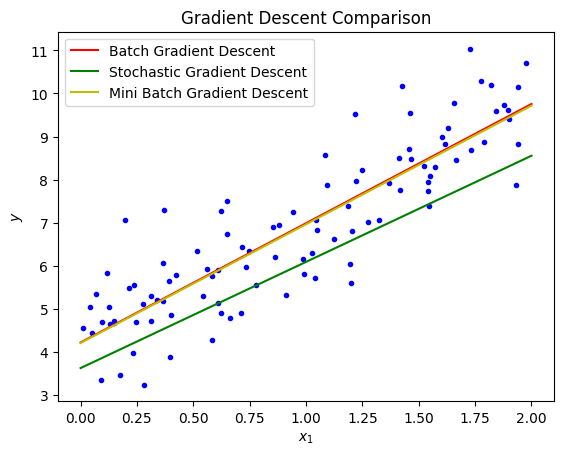

In [ ]:
def plot_GD(X,y,theta_bgd,thetha_sgd,theta_mbgd):
  plt.plot(X,y,"b.")
  X_new = np.array([[0],[2]])
  X_new_b = np.c_[np.ones((2,1)),X_new]
  print(X_new)

  y_predict_bgd = X_new_b.dot(theta_bgd)
  y_predict_sgd = X_new_b.dot(theta_sgd)
  y_predict_mbgd = X_new_b.dot(theta_mbgd)

  plt.plot(X_new,y_predict_bgd,"r-",label="Batch Gradient Descent")
  plt.plot(X_new,y_predict_sgd,"g-",label="Stochastic Gradient Descent")
  plt.plot(X_new,y_predict_mbgd,"y-",label="Mini Batch Gradient Descent")
  plt.xlabel("$x_1$")
  plt.ylabel("$y$")
  plt.legend(loc = "upper left")
  plt.title("Gradient Descent Comparison")
  plt.show()

plot_GD(X,y,theta_bgd,theta_sgd,theta_mbgd)

# Advanced Optimizers in Gradient Descent


---


1.   Momentum-based
2.   AdaGrad
3.   RMSprop
4.   ADAM
5.   AdaDelta



## Momentum-based

In [ ]:
def GD_with_momentum(X, y, theta, alpha, gamma, epochs):
  m = len(y)
  velocity = np.zeros_like(theta)
  for iteration in range(epochs):
    gradients = (1/m) * X.T.dot(X.dot(theta) - y)
    velocity = gamma * velocity + alpha * gradients
    theta = theta - velocity
  return theta

X = np.array([[1,2],[3,4],[5,6]])
y = np.array([1,2,3])
theta = np.zeros(X.shape[1])
alpha = 0.1
gamma = 0.9
epochs = 1000

theta_momentum = GD_with_momentum(X, y, theta, alpha, gamma, epochs)
print("Momentum based GD:",theta_momentum)


Momentum based GD: [-1.89327171e-17  5.00000000e-01]


## AdaGrad

AdaGrad: [[3.08910875]
 [3.73626968]]


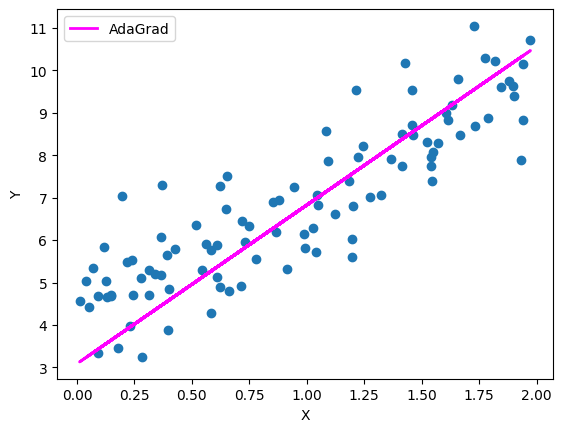

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]

alpha = 0.1
epsilon = 1e-8
epochs = 1000

theta = np.random.randn(2, 1)
gradient_accum = np.zeros_like(theta)

def GD_with_AdaGrad(X, y, theta, alpha, epsilon, epochs):
    m = len(y)
    gradient_accum = np.zeros_like(theta)
    for iteration in range(epochs):
        gradients = (2 / m) * X.T.dot(X.dot(theta) - y)
        gradient_accum += gradients ** 2
        adjusted_gradients = gradients / (np.sqrt(gradient_accum) + epsilon)
        theta = theta - alpha * adjusted_gradients
    return theta

theta = GD_with_AdaGrad(X_b, y, theta, alpha, epsilon, epochs)
print("AdaGrad:", theta)

plt.scatter(X, y)
plt.plot(X, X_b.dot(theta), color='magenta', linewidth=2, label="AdaGrad")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## RMSprop

RMSprop: [[4.16509616]
 [2.72011339]]


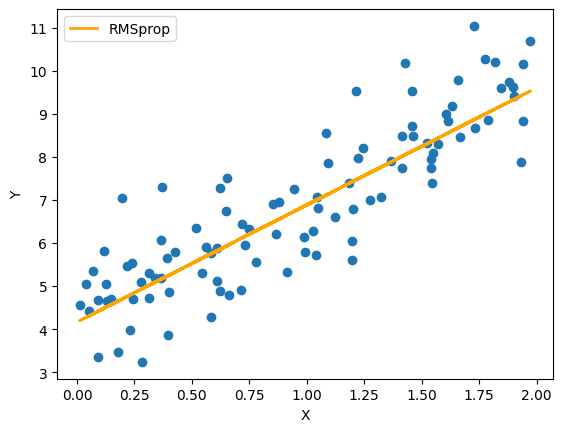

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
learning_rate = 0.1
epsilon = 1e-8
epochs = 1000
beta = 0.9
theta_rms = np.random.randn(2, 1)

def GD_with_RMSprop(X, y, theta, learning_rate, epsilon, beta, epochs):
    m = len(y)
    squared_gradient_accum = np.zeros_like(theta)
    for iteration in range(epochs):
        gradients = (2 / m) * X.T.dot(X.dot(theta) - y)
        squared_gradient_accum = beta * squared_gradient_accum + (1 - beta) * (gradients ** 2)
        adjusted_gradients = gradients / (np.sqrt(squared_gradient_accum) + epsilon)
        theta = theta - learning_rate * adjusted_gradients
    return theta

theta_rms = GD_with_RMSprop(X_b, y, theta_rms, learning_rate, epsilon, beta, epochs)
print("RMSprop:", theta_rms)

plt.scatter(X, y)
plt.plot(X, X_b.dot(theta_rms), color='orange', linewidth=2, label="RMSprop")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()